In [7]:
import sys
import re
from tqdm import tqdm

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

sys.path.append("../")
from calculus_path_mod.term_engine import *
from calculus_path_mod.reduction_strategy import *
from calculus_path_mod.terms import num_comparison, nat_numbers, arithm_ops, combinators, pairs, logic
from calculus_path_mod.terms.pseudonym import *

from calculus_path_mod.json_serialization import load_terms
from fitter import Fitter, get_common_distributions
from calculus_utils.drawing import draw_steps_displot

# Load Terms

In [2]:
terms_LO = load_terms("../tests_11_retests/terms_210_filtered_LO.dat")
terms_RI = load_terms("../tests_11_retests/terms_210_filtered_RI.dat")

In [3]:
strategy_LO = LOStrategy()
strategy_LI = LIStrategy()

steps_LO_tLO = [term.normalize(strategy_LO)[1] for term in tqdm(terms_LO, desc="LO for t-LO")]
steps_LI_tLO = [term.normalize(strategy_LI)[1] for term in tqdm(terms_LO, desc="LI for t-LO")]

vertices_tLO = [term.vertices_number for term in tqdm(terms_LO)]
high_tLO = [term.term_high for term in tqdm(terms_LO)]
width_tLO = [term.term_width for term in tqdm(terms_LO)]

100%|██████████| 226/226 [00:00<00:00, 50388.73it/s]


In [9]:
redexes_tLO = [len(term.redexes) for term in tqdm(terms_LO)]

100%|██████████| 226/226 [00:00<00:00, 34177.49it/s]


In [4]:
def draw_multi_line(comp_data: dict, x_label="Term no", y_label="Y", title="Some comparing"):
    for key in comp_data.keys():
        plt.plot(
            range(1, len(comp_data[key][0]) + 1), comp_data[key][0], comp_data[key][1], label=key
        )

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend(loc="upper right")
    plt.show()

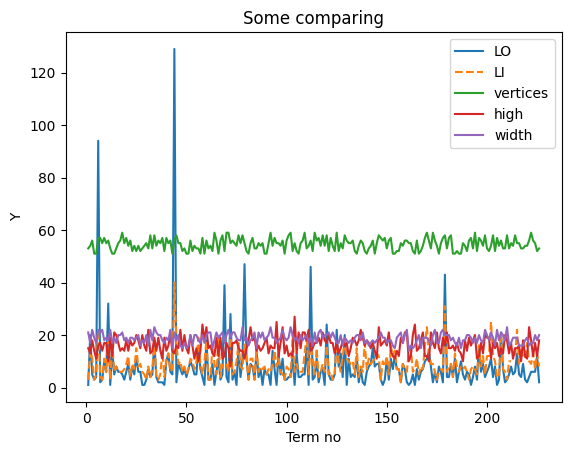

In [5]:
cd_dict = {
    "LO": (steps_LO_tLO, "-"),
    "LI": (steps_LI_tLO, "--"),
    "vertices": (vertices_tLO, "-"),
    "high": (high_tLO, "-"),
    "width": (width_tLO, "-"),
}

draw_multi_line(cd_dict)

In [10]:
steps_frame_tLO = pd.DataFrame()

steps_frame_tLO["LO"] = steps_LO_tLO
steps_frame_tLO["LI"] = steps_LI_tLO
steps_frame_tLO["vertices"] = vertices_tLO
steps_frame_tLO["high"] = high_tLO
steps_frame_tLO["width"] = width_tLO
steps_frame_tLO["redexes"] = redexes_tLO

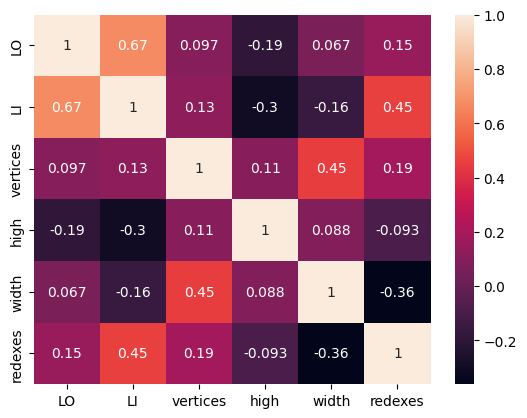

In [11]:
corr_matrix = steps_frame_tLO.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()